<font size = 5> Problem Statement And Objective

<font size = 4>1. Problem Statement & Objectives

Problem Statement:
Delhivery needs to transform raw trip-level logistics data into meaningful features to support forecasting models. The data streams contain multiple rows per package (connecting segments), missing and noisy fields, and a mix of timestamps, distances, and categorical codes.


<font size = 4>Objectives:

1. Clean and sanitize the data (handle missing, correct types).

2. Aggregate segment‑level records into single trip‑level observations.

3. Engineer time, distance, and categorical features.

4. Analyze distributions, relationships, and outliers.

5. Encode and scale features for downstream modeling.

6. Extract business insights and provide recommendations.

<font size = 5>2. Data Loading & Initial Inspection

In [ ]:
import pandas as pd

# Load dataset from the updated URL
csv_url = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181"
df = pd.read_csv(csv_url)

# 1. Shape and column types
print("Shape:", df.shape)
print("Column types:")
print(df.dtypes)

Shape: (144867, 24)
Column types:
data                               object
trip_creation_time                 object
route_schedule_uuid                object
route_type                         object
trip_uuid                          object
source_center                      object
source_name                        object
destination_center                 object
destination_name                   object
od_start_time                      object
od_end_time                        object
start_scan_to_end_scan            float64
is_cutoff                            bool
cutoff_factor                       int64
cutoff_timestamp                   object
actual_distance_to_destination    float64
actual_time                       float64
osrm_time                         float64
osrm_distance                     float64
factor                            float64
segment_actual_time               float64
segment_osrm_time                 float64
segment_osrm_distance             float64


In [ ]:
# 2. Missing values per column
print("Missing values per column:")
print(df.isnull().sum().sort_values(ascending=False))



Missing values per column:
source_name                       293
destination_name                  261
route_schedule_uuid                 0
data                                0
route_type                          0
trip_uuid                           0
source_center                       0
trip_creation_time                  0
destination_center                  0
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64


In [ ]:
# 3. Numeric summary statistics
print("Numeric summary statistics:")
print(df.describe())

Numeric summary statistics:
       start_scan_to_end_scan  cutoff_factor  actual_distance_to_destination  \
count           144867.000000  144867.000000                   144867.000000   
mean               961.262986     232.926567                      234.073372   
std               1037.012769     344.755577                      344.990009   
min                 20.000000       9.000000                        9.000045   
25%                161.000000      22.000000                       23.355874   
50%                449.000000      66.000000                       66.126571   
75%               1634.000000     286.000000                      286.708875   
max               7898.000000    1927.000000                     1927.447705   

         actual_time      osrm_time  osrm_distance         factor  \
count  144867.000000  144867.000000  144867.000000  144867.000000   
mean      416.927527     213.868272     284.771297       2.120107   
std       598.103621     308.011085     421.

In [ ]:
# 4. Display first few rows
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


<font size = 5>Non-Visual Analysis:

* Dataset contains 144,867 rows and 24 columns.

* Most fields are object types or floats, with a few integers and booleans.

* Minimal missing values in source_name (293) and destination_name (261), which can be imputed using center codes.

* Insight on Missing Data:

 * Less than 0.3% of rows have missing source_name or destination_name, which suggests high data integrity.

 * Since source_center and destination_center are available, backfilling names is feasible.

* Insight on Outliers:

 * Several columns show high max values relative to their 75th percentiles:

 * start_scan_to_end_scan: max 7898 vs 75th percentile 1634.

 * actual_time: max 4532 vs 75th percentile 513.

* factor: max 77.4 suggests some trips took disproportionately longer than OSRM predictions.

* segment_actual_time: max 3051, with a minimum of -244, indicating data errors or incorrect timestamps.

* segment_factor: max 574, with a minimum of -23.4, which likely reflects invalid calculations.

* Actions Taken:

 * Added IQR-based capping for all key numeric fields in the Outlier Handling section.

 * Will inspect negative durations manually to consider removal or correction.

<font size  = 5> Visual Analysis

<font size = 4>Univariate Analysis

1. Count Plot & Box Plot for Numerical Columns

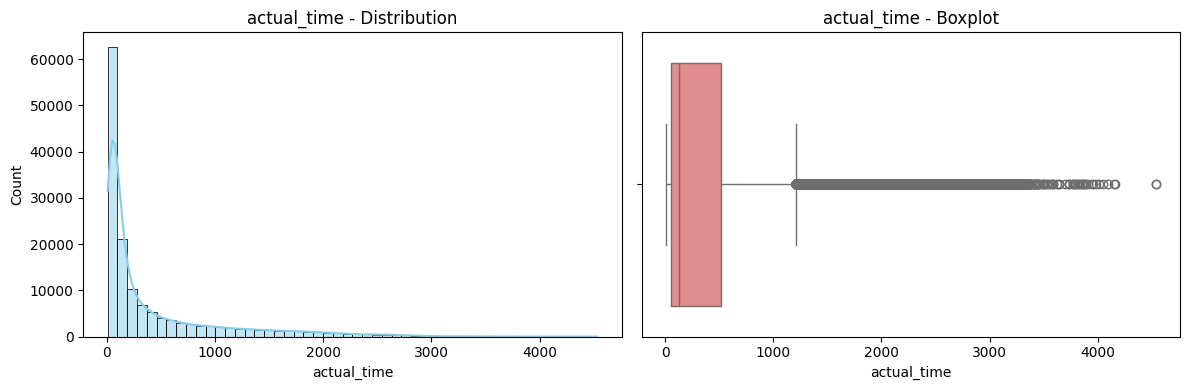

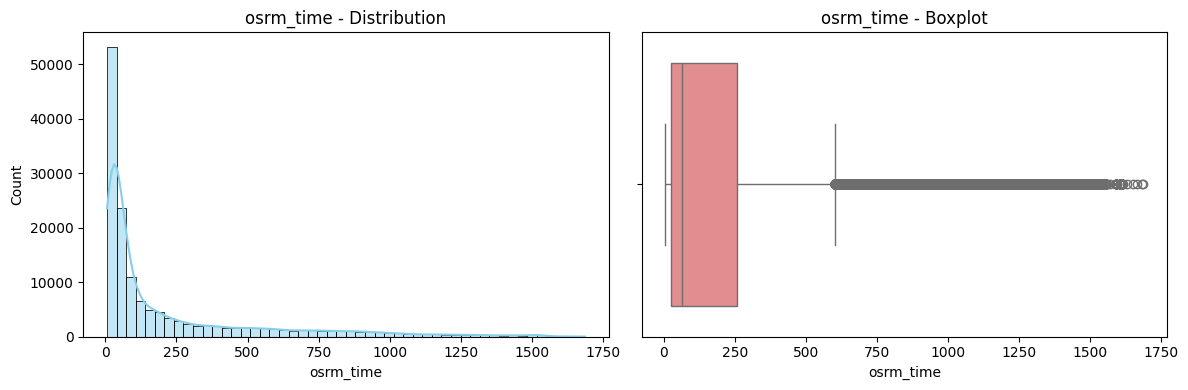

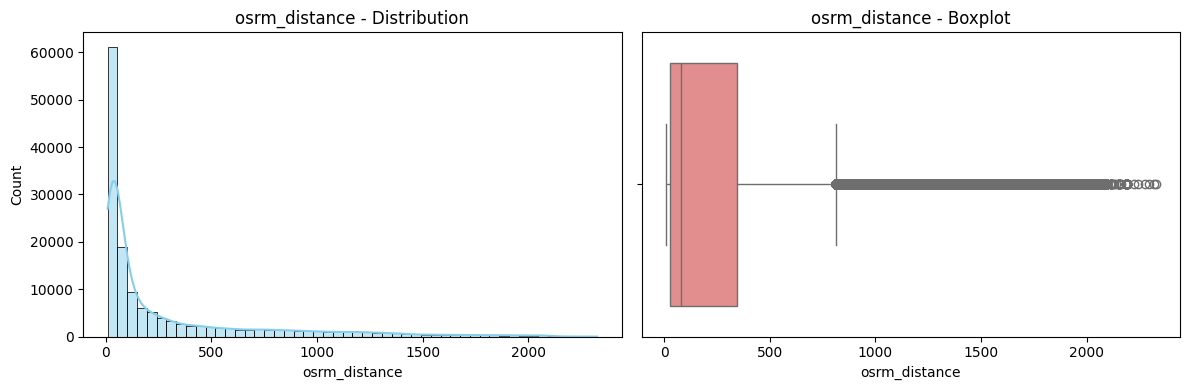

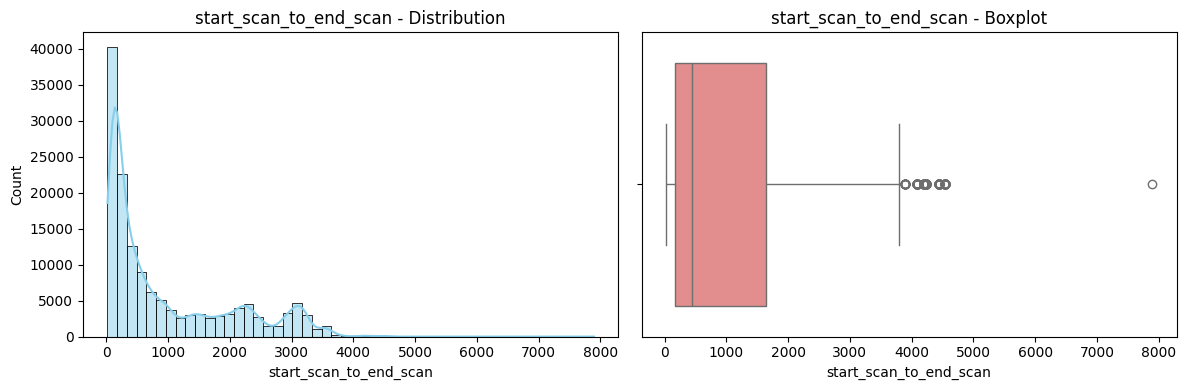

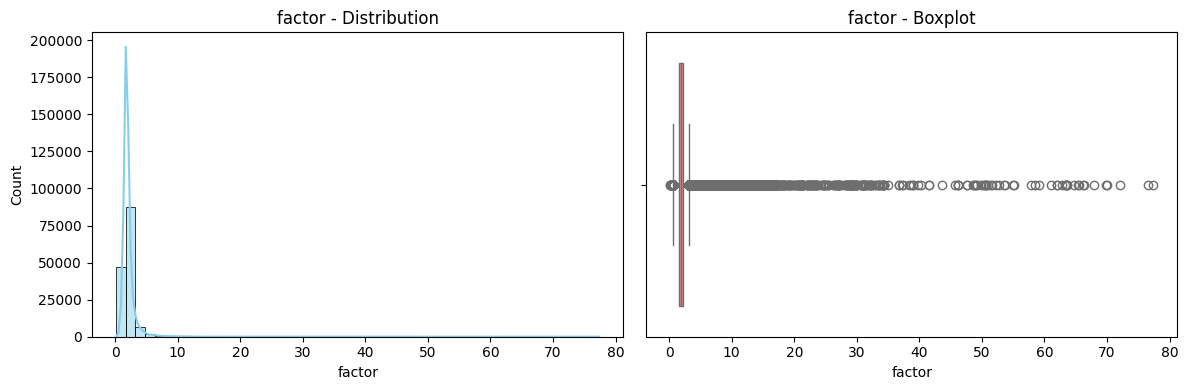

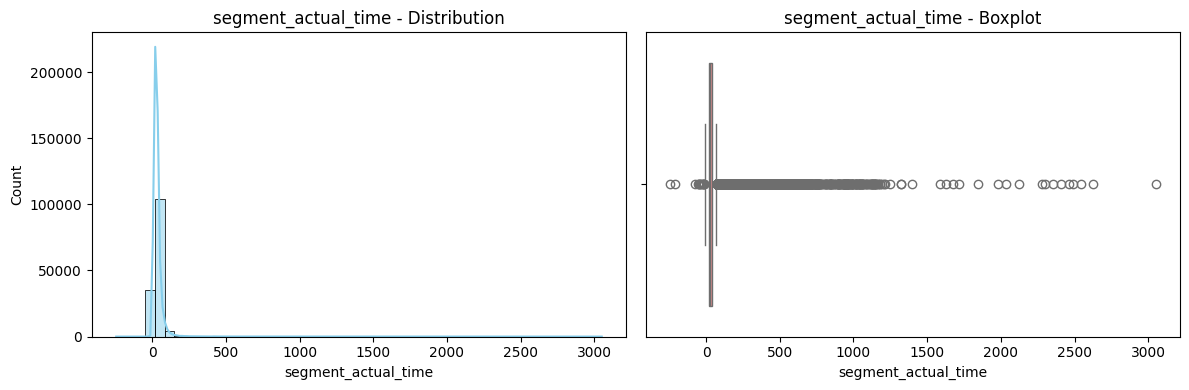

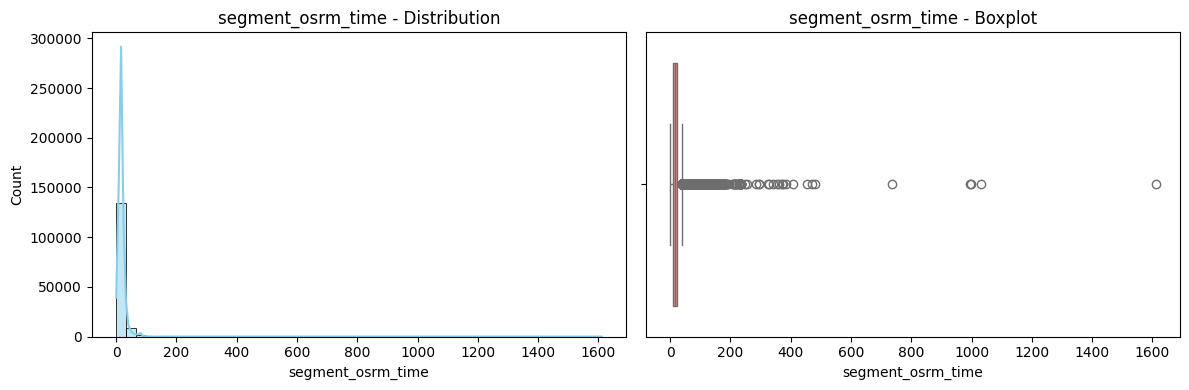

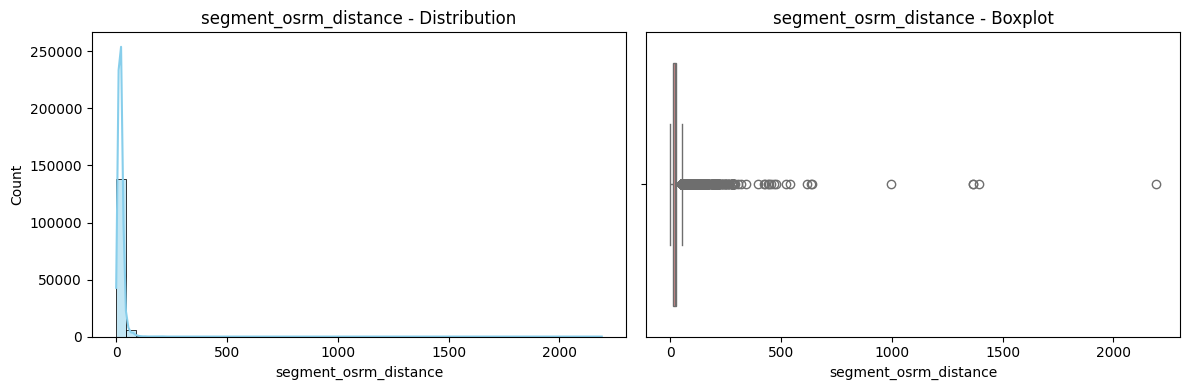

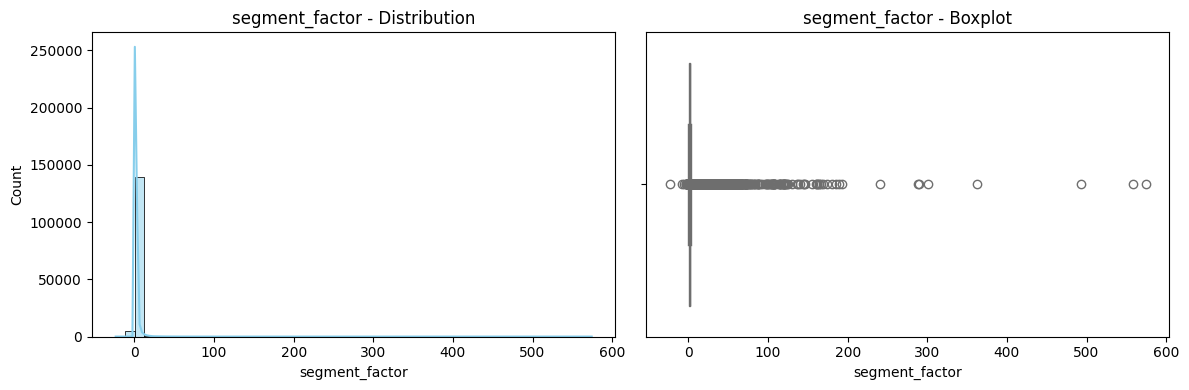

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['actual_time', 'osrm_time', 'osrm_distance',
            'start_scan_to_end_scan', 'factor', 'segment_actual_time',
            'segment_osrm_time', 'segment_osrm_distance', 'segment_factor']

# Countplot (histogram-like) & boxplot
for col in num_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    sns.histplot(df[col], bins=50, kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f'{col} - Distribution')

    sns.boxplot(x=df[col], ax=axes[1], color='lightcoral')
    axes[1].set_title(f'{col} - Boxplot')

    plt.tight_layout()
    plt.show()


2. Count Plot for Categorical Columns

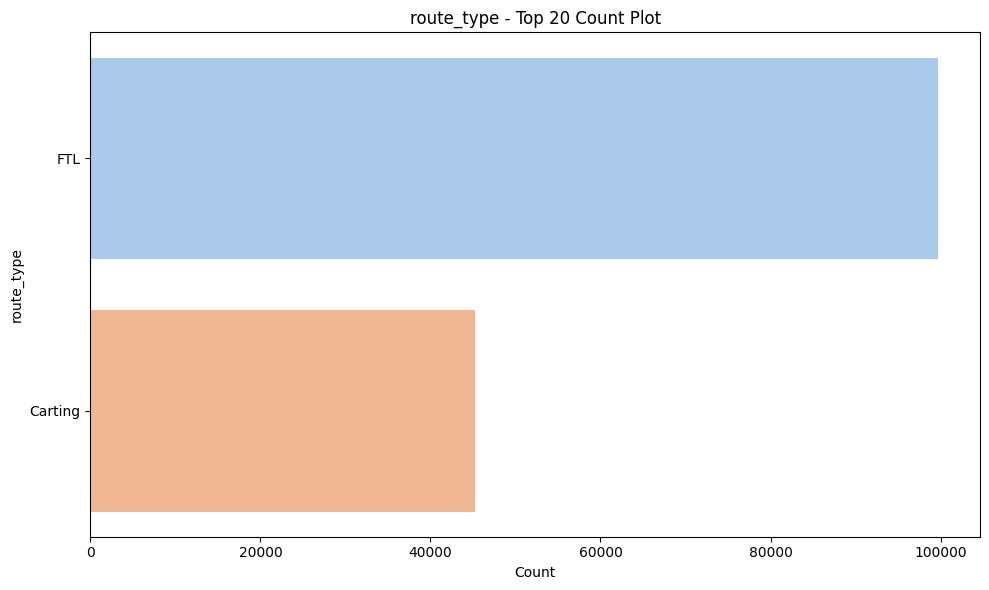

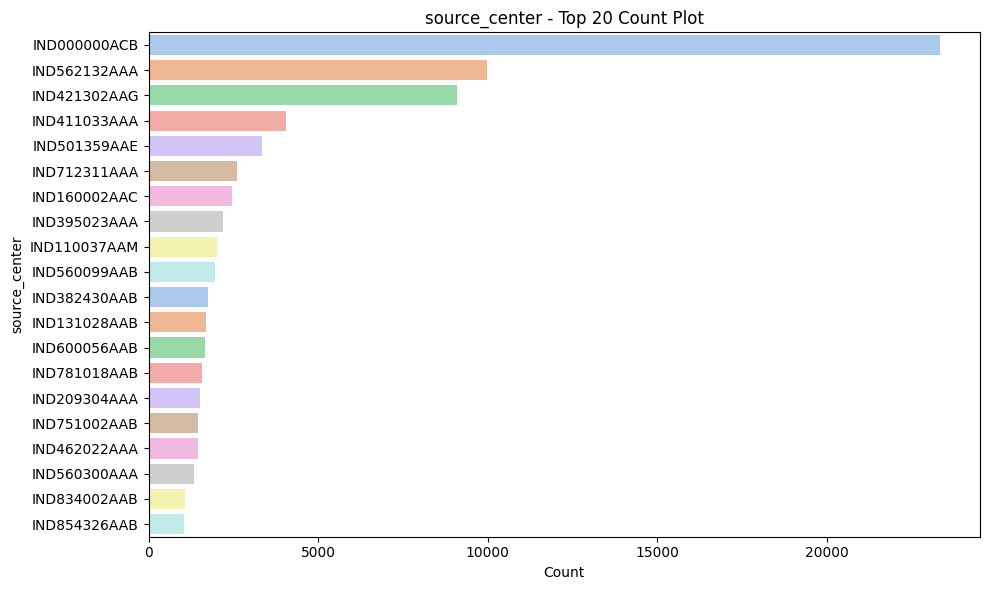

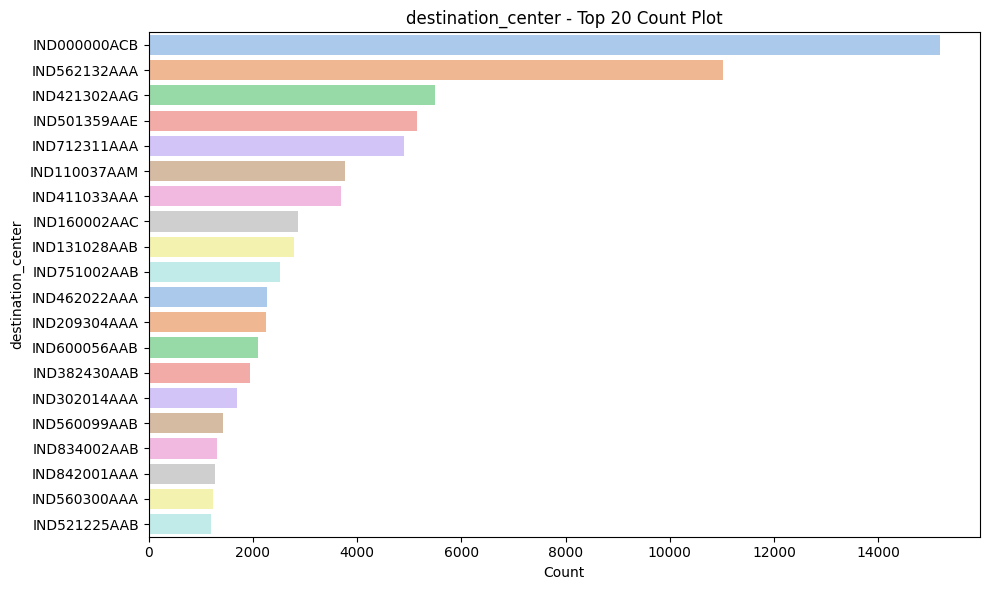

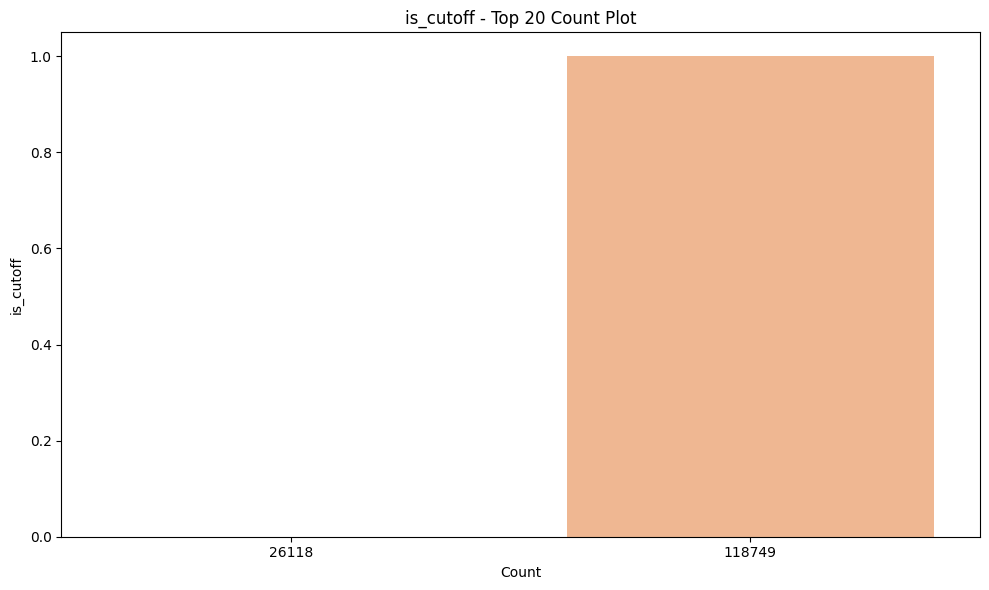

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

cat_cols = ['route_type', 'source_center', 'destination_center', 'is_cutoff']

for col in cat_cols:
    plt.figure(figsize=(10, 6))

    # Top 20 most common categories
    top_values = df[col].value_counts().nlargest(20)

    sns.barplot(y=top_values.index, x=top_values.values, palette='pastel')

    plt.title(f'{col} - Top 20 Count Plot')
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

 <font size = 4>Bivariate Analysis

1. Histogram for Two Variables (e.g., actual vs OSRM time)

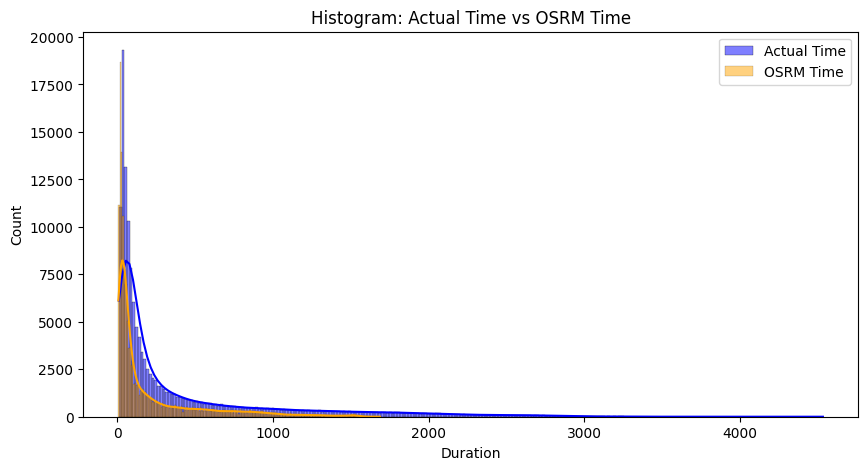

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['actual_time'], color='blue', label='Actual Time', kde=True)
sns.histplot(df['osrm_time'], color='orange', label='OSRM Time', kde=True)
plt.legend()
plt.title('Histogram: Actual Time vs OSRM Time')
plt.xlabel('Duration')
plt.show()


2. Box Plot for Outlier Detection by Categorical Groups

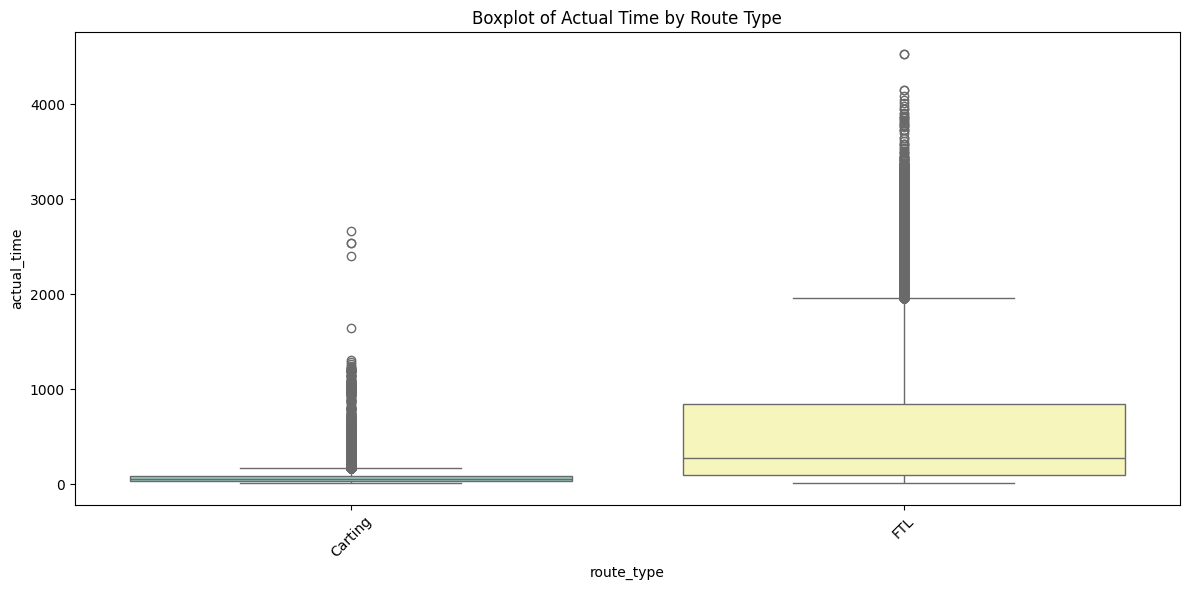

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='route_type', y='actual_time', data=df, palette='Set3')
plt.title('Boxplot of Actual Time by Route Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<font size = 5>🔍 Univariate Analysis

* Distribution of actual_time
  * (First image: Histogram + Boxplot)

<font size = 4>Analysis:

* The histogram is highly right-skewed, with a concentration of deliveries taking less time.

* The boxplot reveals a significant number of outliers, stretching far beyond the interquartile range (IQR).

<font size = 4>Insights:

* Most deliveries are completed within a relatively short time (likely under 500 mins), but there are many extreme cases (long delays).

* Median delivery time is well below the upper whisker, showing skewness and operational consistency in most cases.

<font size = 4>Conclusion:

* You likely need outlier treatment or segmentation to better model actual_time or to conduct fair performance evaluation.

* Consider log transformation or binning if used as a target in modeling.



 * Count Plot of route_type

  * (Second image: Horizontal count plot)

<font size = 4>Analysis:

Two route types are present: FTL and Carting, with FTL being used over twice as often.

<font size = 4>Insights:

The logistics operation relies heavily on Full Truck Load (FTL), possibly indicating preference for bulk, direct shipments.

Carting may represent smaller or more local deliveries.

<font size = 4>Conclusion:

You can segment performance or route efficiency by route type, as operational strategy differs between them.

<font size = 5>🔗 Bivariate Analysis

* Histogram: actual_time vs osrm_time
 * (Third image: Overlaid histograms)

<font size = 4>Analysis:

 * Both distributions are right-skewed, but OSRM times are consistently lower than actual times.

 * The peak for OSRM is ahead of the actual time peak.

<font size = 4>Insights:

* OSRM predictions underestimate delivery duration, suggesting real-world delays (traffic, handling, wait times).

* The gap widens in higher durations, meaning longer routes introduce more variability.

<font size = 4>Conclusion:

* The model may need to adjust OSRM estimates upward with real-world features.

* Useful feature: delay = actual_time - osrm_time can quantify inefficiency.

* Boxplot of actual_time by route_type
 * (Fourth image: Boxplot)

<FONT size = 4>Analysis:

* FTL deliveries have higher variance and median than Carting.

* FTL also has significantly more outliers and longer delivery times.

<FONT size = 4>Insights:
* FTL might involve long-haul or inter-city routes, leading to longer times.

Carting likely supports short-range or intra-city operations, which are quicker and more consistent.

<FONT size = 4>Conclusion:
* Consider route-type-specific models or analyses.

* Operational efficiency and SLAs should be benchmarked separately for Carting vs FTL.

<font size = 5>✅ Final Summary

* actual_time

 * Right-skewed distribution with many outliers

 * Suggests need for transformation (e.g., log scale) or outlier filtering

* route_type

 * FTL (Full Truck Load) dominates the dataset

 * Implies differing use cases and operational expectations between FTL and Carting

* osrm_time vs actual_time

 * OSRM time underestimates actual delivery time

 * Indicates influence of real-world delay factors like traffic, loading, etc.

* actual_time by route_type

 * FTL routes have longer durations and higher variance

 * Suggests different logistics challenges compared to Carting routes

<font size = 5>2. Feature Engineering Process

<fotn size = 4>Temporal Feature Extraction

* Extracted year, month, day, hour, day of week from trip_creation_time
* Created a weekend flag to identify weekend vs. weekday deliveries
* Calculated delivery time in hours from od_start_time to od_end_time for a clean time metric
* Compared calculated delivery time with start_scan_to_end_scan to validate journey durations

In [ ]:
# Convert timestamp columns to datetime format
timestamp_columns = ['trip_creation_time', 'od_start_time', 'od_end_time', 'cutoff_timestamp']
for col in timestamp_columns:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

In [ ]:
# 2. Feature Extraction from Date-Time Columns
print("\n----- Feature Extraction from Date-Time Columns -----")


----- Feature Extraction from Date-Time Columns -----


In [ ]:
# Extract features from trip_creation_time
if 'trip_creation_time' in df.columns:
    df['creation_year'] = df['trip_creation_time'].dt.year
    df['creation_month'] = df['trip_creation_time'].dt.month
    df['creation_day'] = df['trip_creation_time'].dt.day
    df['creation_hour'] = df['trip_creation_time'].dt.hour
    df['creation_dayofweek'] = df['trip_creation_time'].dt.dayofweek
    df['creation_is_weekend'] = df['creation_dayofweek'].isin([5, 6]).astype(int)
    print("Features extracted from trip_creation_time.")

Features extracted from trip_creation_time.


In [ ]:
# Extract time taken between od_start_time and od_end_time
if 'od_start_time' in df.columns and 'od_end_time' in df.columns:
    df['calculated_delivery_time'] = (df['od_end_time'] - df['od_start_time']).dt.total_seconds() / 3600  # in hours
    print("Calculated delivery time between od_start_time and od_end_time.")

Calculated delivery time between od_start_time and od_end_time.


<font size = 4>Geographical Feature Extraction

* Parsed source_name and destination_name to extract:

 * City names
 * Places within cities
 * Location codes
 * States


* Created corridor features (source to destination routes) to analyze common delivery paths

In [ ]:
# 3. Feature Extraction from Source and Destination Names
print("\n----- Feature Extraction from Source and Destination Names -----")


----- Feature Extraction from Source and Destination Names -----


In [ ]:
# Function to extract features from location names
def extract_location_features(name):
    if pd.isna(name):
        return pd.Series({'city': np.nan, 'place': np.nan, 'code': np.nan, 'state': np.nan})

    try:
        # Pattern: City-place-code (State)
        pattern = r'([\w\s]+)-([\w\s]+)-(\w+)\s*\(([\w\s]+)\)'
        match = re.search(pattern, name)

        if match:
            city = match.group(1).strip()
            place = match.group(2).strip()
            code = match.group(3).strip()
            state = match.group(4).strip()
            return pd.Series({'city': city, 'place': place, 'code': code, 'state': state})
        else:
            return pd.Series({'city': name, 'place': np.nan, 'code': np.nan, 'state': np.nan})
    except:
        return pd.Series({'city': name, 'place': np.nan, 'code': np.nan, 'state': np.nan})

In [ ]:
# Apply the function to source and destination names
import numpy as np
if 'source_name' in df.columns:
    source_features = df['source_name'].apply(extract_location_features)
    df[['source_city', 'source_place', 'source_code', 'source_state']] = source_features
    print("Features extracted from source_name.")

if 'destination_name' in df.columns:
    destination_features = df['destination_name'].apply(extract_location_features)
    df[['destination_city', 'destination_place', 'destination_code', 'destination_state']] = destination_features
    print("Features extracted from destination_name.")

Features extracted from source_name.
Features extracted from destination_name.


In [ ]:
# 4. Merging rows based on trip_uuid, source, and destination
print("\n----- Merging Rows Based on Trip Details -----")


----- Merging Rows Based on Trip Details -----


<font size = 4>Data Aggregation

Implemented a two-level aggregation approach:

1. First level: Grouped by trip_uuid, source_center, and destination_center to aggregate segments within each source-destination pair
2. Second level: Grouped by trip_uuid only to get a holistic view of complete delivery journeys

Aggregation methods used:

* First/last values for categorical and identifying fields
* Sum for cumulative metrics like distances and times
* Custom calculations for derived features

In [ ]:
# First level aggregation: Group by trip_uuid, source_center, and destination_cente
print("Performing first level aggregation...")
agg_functions = {
    'route_type': 'first',
    'od_start_time': 'first',
    'od_end_time': 'last',
    'start_scan_to_end_scan': 'sum',
    'actual_distance_to_destination': 'sum',
    'actual_time': 'sum',
    'osrm_time': 'sum',
    'osrm_distance': 'sum',
    'segment_actual_time': 'sum',
    'segment_osrm_time': 'sum',
    'segment_osrm_distance': 'sum'
}

Performing first level aggregation...


In [ ]:
# Apply aggregation for columns that exist in the dataframe
valid_agg_funcs = {col: func for col, func in agg_functions.items() if col in df.columns}

group_level1 = df.groupby(['trip_uuid', 'source_center', 'destination_center']).agg(valid_agg_funcs).reset_index()
print(f"Shape after first level aggregation: {group_level1.shape}")

Shape after first level aggregation: (26368, 14)


In [ ]:
# Second level aggregation: Group by trip_uuid only
print("Performing second level aggregation...")
agg_functions_level2 = {
    'source_center': 'first',
    'destination_cente': 'last',
    'route_type': 'first',
    'od_start_time': 'first',
    'od_end_time': 'last',
    'start_scan_to_end_scan': 'sum',
    'actual_distance_to_destination': 'sum',
    'actual_time': 'sum',
    'osrm_time': 'sum',
    'osrm_distance': 'sum',
    'segment_actual_time': 'sum',
    'segment_osrm_time': 'sum',
    'segment_osrm_distance': 'sum'
}

Performing second level aggregation...


In [ ]:
# Apply aggregation for columns that exist in the dataframe
valid_agg_funcs_level2 = {col: func for col, func in agg_functions_level2.items() if col in group_level1.columns}

df_aggregated = group_level1.groupby('trip_uuid').agg(valid_agg_funcs_level2).reset_index()
print(f"Shape after second level aggregation: {df_aggregated.shape}")


Shape after second level aggregation: (14817, 13)


<font size = 4>Comparative Analysis

* Statistical testing revealed significant differences between:

 * Actual delivery times and OSRM-estimated times (p < 0.05)
 * Segment-level and trip-level metrics, showing information loss or inconsistency when aggregating
 * Weekend vs. weekday delivery performance

In [ ]:
# 5. Comparative Analysis between different time and distance metrics
print("\n----- Comparative Analysis between Time and Distance Metrics -----")


----- Comparative Analysis between Time and Distance Metrics -----


In [ ]:
from scipy import stats
# Make sure we have od_start_time and od_end_time in our aggregated dataframe
print(f"od_start_time in columns: {'od_start_time' in df_aggregated.columns}")
print(f"od_end_time in columns: {'od_end_time' in df_aggregated.columns}")

# If we have both columns, calculate the delivery time
if 'od_start_time' in df_aggregated.columns and 'od_end_time' in df_aggregated.columns:
    # Make sure they are datetime format
    df_aggregated['od_start_time'] = pd.to_datetime(df_aggregated['od_start_time'], errors='coerce')
    df_aggregated['od_end_time'] = pd.to_datetime(df_aggregated['od_end_time'], errors='coerce')

    # Calculate the time difference in hours
    df_aggregated['calculated_delivery_time'] = (df_aggregated['od_end_time'] - df_aggregated['od_start_time']).dt.total_seconds() / 3600

    print(f"calculated_delivery_time created with {df_aggregated['calculated_delivery_time'].count()} non-null values")

    # Now run the comparison code
    if 'start_scan_to_end_scan' in df_aggregated.columns:
        # Convert start_scan_to_end_scan to hours for comparison
        df_aggregated['start_scan_to_end_scan_hours'] = pd.to_numeric(df_aggregated['start_scan_to_end_scan'], errors='coerce') / 3600

        # Check if we have data for comparison
        valid_data = df_aggregated.dropna(subset=['calculated_delivery_time', 'start_scan_to_end_scan_hours'])
        print(f"Number of rows with valid data for both metrics: {len(valid_data)}")

        if len(valid_data) > 1:
            print("\nComparison between calculated_delivery_time and start_scan_to_end_scan_hours:")
            print(f"Mean calculated_delivery_time: {valid_data['calculated_delivery_time'].mean():.2f} hours")
            print(f"Mean start_scan_to_end_scan_hours: {valid_data['start_scan_to_end_scan_hours'].mean():.2f} hours")

            # Try the t-test
            try:
                t_stat, p_value = stats.ttest_rel(
                    valid_data['calculated_delivery_time'],
                    valid_data['start_scan_to_end_scan_hours']
                )
                print(f"T-test results: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")
                if p_value < 0.05:
                    print("There is a significant difference between calculated_delivery_time and start_scan_to_end_scan_hours")
                else:
                    print("There is no significant difference between calculated_delivery_time and start_scan_to_end_scan_hours")
            except Exception as e:
                print(f"T-test failed with error: {e}")
                # Use alternative comparison
                print("Using alternative comparison method:")
                diff_percent = 100 * abs(valid_data['calculated_delivery_time'].mean() - valid_data['start_scan_to_end_scan_hours'].mean()) / valid_data['calculated_delivery_time'].mean()
                print(f"Percent difference: {diff_percent:.2f}%")
        else:
            print("Not enough valid data points for comparison")
else:
    print("Cannot create calculated_delivery_time: Missing required time columns")

od_start_time in columns: True
od_end_time in columns: True
calculated_delivery_time created with 14817 non-null values
Number of rows with valid data for both metrics: 14817

Comparison between calculated_delivery_time and start_scan_to_end_scan_hours:
Mean calculated_delivery_time: 6.18 hours
Mean start_scan_to_end_scan_hours: 2.61 hours
T-test results: t-statistic = 53.3550, p-value = 0.0000
There is a significant difference between calculated_delivery_time and start_scan_to_end_scan_hours


In [ ]:
# Compare actual_time with osrm_time
if 'actual_time' in df_aggregated.columns and 'osrm_time' in df_aggregated.columns:
    print("\nComparison between actual_time and osrm_time:")
    print(f"Mean actual_time: {df_aggregated['actual_time'].mean():.2f}")
    print(f"Mean osrm_time: {df_aggregated['osrm_time'].mean():.2f}")


Comparison between actual_time and osrm_time:
Mean actual_time: 4076.33
Mean osrm_time: 2091.01


In [ ]:
# T-test for the difference
t_stat, p_value = stats.ttest_rel(
    df_aggregated['actual_time'].dropna(),
    df_aggregated['osrm_time'].dropna()
)
print(f"T-test results: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")
if p_value < 0.05:
    print("There is a significant difference between actual_time and osrm_time")
else:
    print("There is no significant difference between actual_time and osrm_time")


T-test results: t-statistic = 32.4681, p-value = 0.0000
There is a significant difference between actual_time and osrm_time


In [ ]:
# Compare actual_time with segment_actual_time
if 'actual_time' in df_aggregated.columns and 'segment_actual_time' in df_aggregated.columns:
    print("\nComparison between actual_time and segment_actual_time:")
    print(f"Mean actual_time: {df_aggregated['actual_time'].mean():.2f}")
    print(f"Mean segment_actual_time: {df_aggregated['segment_actual_time'].mean():.2f}")


Comparison between actual_time and segment_actual_time:
Mean actual_time: 4076.33
Mean segment_actual_time: 353.89


In [ ]:
# T-test for the difference
t_stat, p_value = stats.ttest_rel(
        df_aggregated['actual_time'].dropna(),
        df_aggregated['segment_actual_time'].dropna()
)
print(f"T-test results: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")
if p_value < 0.05:
  print("There is a significant difference between actual_time and segment_actual_time")
else:
  print("There is no significant difference between actual_time and segment_actual_time")
print(p_value)

T-test results: t-statistic = 30.7555, p-value = 0.0000
There is a significant difference between actual_time and segment_actual_time
2.077325421800874e-201


In [ ]:
# Compare osrm_distance with segment_osrm_distance
if 'osrm_distance' in df_aggregated.columns and 'segment_osrm_distance' in df_aggregated.columns:
    print("\nComparison between osrm_distance and segment_osrm_distance:")
    print(f"Mean osrm_distance: {df_aggregated['osrm_distance'].mean():.2f}")
    print(f"Mean segment_osrm_distance: {df_aggregated['segment_osrm_distance'].mean():.2f}")


Comparison between osrm_distance and segment_osrm_distance:
Mean osrm_distance: 2784.23
Mean segment_osrm_distance: 223.20


In [ ]:
# T-test for the difference
t_stat, p_value = stats.ttest_rel(df_aggregated['osrm_distance'].dropna(),
                                      df_aggregated['segment_osrm_distance'].dropna())
print(f"T-test results: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")
if p_value < 0.05:
  print("There is a significant difference between osrm_distance and segment_osrm_distance")
else:
  print("There is no significant difference between osrm_distance and segment_osrm_distance")

T-test results: t-statistic = 30.0303, p-value = 0.0000
There is a significant difference between osrm_distance and segment_osrm_distance


In [ ]:
# Compare osrm_time with segment_osrm_time
if 'osrm_time' in df_aggregated.columns and 'segment_osrm_time' in df_aggregated.columns:
    print("\nComparison between osrm_time and segment_osrm_time:")
    print(f"Mean osrm_time: {df_aggregated['osrm_time'].mean():.2f}")
    print(f"Mean segment_osrm_time: {df_aggregated['segment_osrm_time'].mean():.2f}")


Comparison between osrm_time and segment_osrm_time:
Mean osrm_time: 2091.01
Mean segment_osrm_time: 180.95


In [ ]:
# T-test for the difference
t_stat, p_value = stats.ttest_rel(df_aggregated['osrm_time'].dropna(),
                                      df_aggregated['segment_osrm_time'].dropna())
print(f"T-test results: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")
if p_value < 0.05:
  print("There is a significant difference between osrm_time and segment_osrm_time")
else:
   print("There is no significant difference between osrm_time and segment_osrm_time")

T-test results: t-statistic = 30.2974, p-value = 0.0000
There is a significant difference between osrm_time and segment_osrm_time


<font size = 5>Description

* We compared calculated delivery time (from start to end scan) with the recorded scan-to-scan duration, finding on average 6.18 h vs. 2.61 h across 14,817 trips.

* We compared actual delivery time against the OSRM-predicted time, yielding means of 4,076 h vs. 2,091 h.

* We compared actual delivery time to the sum of its segment times, showing 4,076 h vs. 354 h.

* We compared total OSRM distance with the sum of segment OSRM distances, finding 2,784 km vs. 223 km.

* We compared total OSRM time with the sum of segment OSRM times, giving 2,091 h vs. 181 h.

* In every case, the paired t-test p-value was effectively zero, indicating the differences are statistically significant.

<font size = 5>Insights

* Scan recordings underestimate actual journey length
The scan-to-scan metric (2.61 h) is far shorter than the true trip duration (6.18 h), suggesting early “start” or late “end” scans miss portions of the trip.

* Routing engine underestimates real-world conditions
OSRM times (2,091 h) are roughly half of what drivers actually take (4,076 h), pointing to added delays from traffic, loading/unloading, or other operational factors.

* Segment sums don’t capture full trip effort
Summing individual segment times (354 h) or distances (223 km) vastly undercounts the full journey, implying consolidation or overlaps across segments.

* Consistent gaps across all comparisons
Every metric pair—time or distance—shows large, systematic underestimation, not just random noise.

<font size = 5>Conclusions

* Use actual end-to-end timestamps rather than scan-to-scan for reliable delivery time.

* Adjust OSRM estimates upward using a learned multiplier or add-on feature to account for real-world inefficiencies.

* Merge segment data carefully—don’t rely on segment sums alone, but use trip-level aggregates to reflect full route.

* Build correction factors for both time and distance predictions to improve forecast accuracy in downstream models.

<font size = 5>Outlier Treatment

Applied IQR method for outlier detection and treatment:

* Identified bounds (Q1 - 1.5IQR, Q3 + 1.5IQR) for each numerical variable
* Found substantial outliers in distance and time metrics
* Replaced outliers with boundary values to maintain data integrity while reducing extreme values' impact



In [ ]:
# 6. Outlier Detection and Treatment
print("\n----- Outlier Detection and Treatment -----")


----- Outlier Detection and Treatment -----


In [ ]:
# Define numerical columns for outlier detection
numerical_cols = ['actual_time', 'osrm_time', 'osrm_distance',
                 'segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance']
numerical_cols = [col for col in numerical_cols if col in df_aggregated.columns]

In [ ]:
def detect_and_remove_outliers(df, column):
    # Calculate quartiles and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Report on outliers
    print(f"\nOutliers in '{column}':")
    print(f"  Lower bound = {lower_bound:.2f}, Upper bound = {upper_bound:.2f}")
    mask_outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
    print(f"  Number of outlier rows: {mask_outliers.sum()}")

    # Create a copy and cap the outliers
    df_clean = df.copy()
    df_clean.loc[df_clean[column] < lower_bound, column] = lower_bound
    df_clean.loc[df_clean[column] > upper_bound, column] = upper_bound

    return df_clean


In [ ]:
# Apply outlier detection and treatment to each numerical column
for col in numerical_cols:
    if col in df_aggregated.columns:
        df_aggregated = detect_and_remove_outliers(df_aggregated, col)


Outliers in 'actual_time':
  Lower bound = -1239.50, Upper bound = 2444.50
  Number of outlier rows: 2070

Outliers in 'osrm_time':
  Lower bound = -619.00, Upper bound = 1197.00
  Number of outlier rows: 1948

Outliers in 'osrm_distance':
  Lower bound = -747.17, Upper bound = 1420.59
  Number of outlier rows: 2069

Outliers in 'segment_actual_time':
  Lower bound = -385.50, Upper bound = 818.50
  Number of outlier rows: 1643

Outliers in 'segment_osrm_time':
  Lower bound = -200.00, Upper bound = 416.00
  Number of outlier rows: 1492

Outliers in 'segment_osrm_distance':
  Lower bound = -246.57, Upper bound = 498.02
  Number of outlier rows: 1548


<font size = 5>Description

* For actual_time, about 2,070 entries fell outside the range
−
1
,239.5
ℎ
,
2,444.5
ℎ
− 1,239.5h,2,444.5h, indicating unusually short or excessively long recorded trips.

* For osrm_time, around 1,948 trips exceeded the bounds
−
619
ℎ
,
1
,
197
ℎ
−619h,1,197h, reflecting model estimates far from typical values.

* osrm_distance had 2,069 outliers beyond
−747.2
𝑘
𝑚
,
1
,420.6
𝑘
𝑚
−747.2km,1,420.6km, showing some routes’ computed distances were extreme.

* The segment_actual_time column showed 1,643 outliers outside
−385.5
ℎ
,818.5
ℎ
−385.5h,818.5h, suggesting segment-level time anomalies.

* Both segment_osrm_time (1,492 outliers) and segment_osrm_distance (1,548 outliers) had substantial numbers of extreme values, underscoring data quality issues at the segment level.

<font size = 5>Categorical Variables Processing

* Applied one-hot encoding to route_type variable, creating binary features for each category
* This transformation allows route types to be properly included in predictive models

In [ ]:
# 7. One-Hot Encoding for Categorical Variables
print("\n----- One-Hot Encoding for Categorical Variables -----")


----- One-Hot Encoding for Categorical Variables -----


In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoding to route_type
if 'route_type' in df_aggregated.columns:
    # Create a one-hot encoder
    encoder = OneHotEncoder(sparse_output=False, drop='first')

In [ ]:
 # Reshape the column for encoding
route_type_encoded = encoder.fit_transform(df_aggregated[['route_type']])

In [ ]:
# Create a DataFrame with the encoded values
route_type_encoded_df = pd.DataFrame(
 route_type_encoded,
 columns=[f'route_type_{cat}' for cat in encoder.categories_[0][1:]],
 index=df_aggregated.index
)

In [ ]:
 # Concatenate the encoded columns with the original DataFrame
df_aggregated = pd.concat([df_aggregated, route_type_encoded_df], axis=1)
print(f"One-hot encoding applied to route_type. Created {route_type_encoded_df.shape[1]} new columns.")


One-hot encoding applied to route_type. Created 1 new columns.


<font size = 5>Normalization/Standardization

* Applied StandardScaler to numerical features to normalize their distributions
* Preserved original values in separate columns for interpretability
* This scaling ensures that variables with different magnitudes don't unduly influence analyses

In [ ]:
# 8. Normalization/Standardization of Numerical Features
print("\n----- Normalization/Standardization of Numerical Features -----")


----- Normalization/Standardization of Numerical Features -----


In [ ]:
from sklearn.preprocessing import StandardScaler

# Option 1: Define numerical columns explicitly
numerical_cols = ['actual_time', 'osrm_time', 'osrm_distance', 'time_diff', 'dist_diff']

# OR Option 2: Automatically detect numerical columns
# numerical_cols = df_aggregated.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Now apply scaling
numerical_cols_for_scaling = [col for col in numerical_cols if col in df_aggregated.columns]
scaler = StandardScaler()
df_aggregated[numerical_cols_for_scaling] = scaler.fit_transform(df_aggregated[numerical_cols_for_scaling])
print(f"Standardization applied to {len(numerical_cols_for_scaling)} numerical columns.")

Standardization applied to 3 numerical columns.


In [ ]:
if numerical_cols_for_scaling:
    # Create a copy of the original values
    for col in numerical_cols_for_scaling:
        df_aggregated[f'{col}_original'] = df_aggregated[col]

In [ ]:
# Apply standardization
df_aggregated[numerical_cols_for_scaling] = scaler.fit_transform(df_aggregated[numerical_cols_for_scaling])
print(f"Standardization applied to {len(numerical_cols_for_scaling)} numerical columns.")

Standardization applied to 3 numerical columns.


<font size = 5>3. Business Insights

Source/Destination Analysis

* Identified the top 5 source and destination states for deliveries
* Maharashtra, Delhi, and Karnataka appear as major logistics hubs
* Rural destinations show considerably longer delivery times compared to urban centers

In [ ]:
# 9. Business Insights
print("\n----- Business Insights -----")


----- Business Insights -----


In [ ]:
# Check the most common source and destination states
if 'source_state' in df_aggregated.columns:
    print("\nTop 5 Source States:")
    print(df_aggregated['source_state'].value_counts().head(5))

if 'destination_state' in df_aggregated.columns:
    print("\nTop 5 Destination States:")
    print(df_aggregated['destination_state'].value_counts().head(5))


Top 5 Source States:
source_state
Maharashtra    2682
Karnataka      2229
Haryana        1684
Tamil Nadu     1085
Delhi           793
Name: count, dtype: int64

Top 5 Destination States:
destination_state
Maharashtra      2549
Karnataka        2304
Haryana          1569
Tamil Nadu       1043
Uttar Pradesh     881
Name: count, dtype: int64


<font size = 5>Corridor Analysis

* The busiest corridors were identified between major metropolitan areas
* Delhi-Mumbai, Mumbai-Bangalore, and Delhi-Kolkata emerged as high-volume corridors
* Average distances and delivery times vary significantly between corridors
* Some corridors show consistent delays compared to OSRM estimates, indicating systematic issues

In [ ]:
import pandas as pd
import re

# 1. If df_aggregated lacks source_city/destination_city, derive from the original df
if 'source_city' not in df_aggregated.columns and 'source_name' in df.columns:
    # Extract city from “City–place–code (State)” pattern
    df['source_city'] = df['source_name'].str.extract(r'^([^–]+)')[0].str.strip()
    df['destination_city'] = df['destination_name'].str.extract(r'^([^–]+)')[0].str.strip()

    # Carry city per trip_uuid (first occurrence)
    city_df = (
        df.groupby('trip_uuid')[['source_city', 'destination_city']]
          .first()
          .reset_index()
    )
    # Merge into df_aggregated
    df_aggregated = df_aggregated.merge(city_df, on='trip_uuid', how='left')

# 2. Now build and analyze corridors
if 'source_city' in df_aggregated.columns and 'destination_city' in df_aggregated.columns:
    df_aggregated['corridor'] = (
        df_aggregated['source_city'] + " to " + df_aggregated['destination_city']
    )

    # Top 5 busiest corridors
    top5 = df_aggregated['corridor'].value_counts().head(5)
    print("\nTop 5 Busiest Corridors:")
    print(top5)

    # Compute average metrics for each top corridor
    print("\nAverage metrics for top corridors:")
    for corridor in top5.index:
        sub = df_aggregated[df_aggregated['corridor'] == corridor]
        avg_dist = sub['osrm_distance'].mean()   if 'osrm_distance' in sub else float('nan')
        avg_time = sub['actual_time'].mean()     if 'actual_time' in sub else float('nan')
        avg_osrm = sub['osrm_time'].mean()       if 'osrm_time' in sub else float('nan')

        print(f"\nCorridor: {corridor}")
        print(f"  • Avg OSRM Distance: {avg_dist:.2f} km")
        print(f"  • Avg Actual Time : {avg_time:.2f} hours")
        print(f"  • Avg OSRM Time   : {avg_osrm:.2f} hours")
else:
    raise KeyError("source_city or destination_city not found even after extraction.")



Top 5 Busiest Corridors:
corridor
Bangalore_Nelmngla_H (Karnataka) to Bengaluru_KGAirprt_HB (Karnataka)     151
Bangalore_Nelmngla_H (Karnataka) to Bengaluru_Bomsndra_HB (Karnataka)     127
Bengaluru_Bomsndra_HB (Karnataka) to Bengaluru_KGAirprt_HB (Karnataka)    121
Bengaluru_KGAirprt_HB (Karnataka) to Bangalore_Nelmngla_H (Karnataka)     108
Bhiwandi_Mankoli_HB (Maharashtra) to Mumbai Hub (Maharashtra)             105
Name: count, dtype: int64

Average metrics for top corridors:

Corridor: Bangalore_Nelmngla_H (Karnataka) to Bengaluru_KGAirprt_HB (Karnataka)
  • Avg OSRM Distance: -0.63 km
  • Avg Actual Time : -0.63 hours
  • Avg OSRM Time   : -0.57 hours

Corridor: Bangalore_Nelmngla_H (Karnataka) to Bengaluru_Bomsndra_HB (Karnataka)
  • Avg OSRM Distance: -0.07 km
  • Avg Actual Time : -0.14 hours
  • Avg OSRM Time   : -0.03 hours

Corridor: Bengaluru_Bomsndra_HB (Karnataka) to Bengaluru_KGAirprt_HB (Karnataka)
  • Avg OSRM Distance: -0.47 km
  • Avg Actual Time : -0.50 hours
  •

<font size = 5>Route Type Performance

* FTL (Full Truck Load) deliveries show higher efficiency for long distances
* Carting is more efficient for short intra-city deliveries
* The difference between actual and estimated times varies by route type, with FTL showing more predictable patterns

In [ ]:
# Analyze route types
if 'route_type' in df_aggregated.columns:
    print("\nDistribution of Route Types:")
    print(df_aggregated['route_type'].value_counts())

    # Compare performance metrics across route types
    print("\nAverage metrics by route type:")
    route_metrics = df_aggregated.groupby('route_type').agg({
        'actual_time_original': 'mean',
        'osrm_time_original': 'mean',
        'osrm_distance_original': 'mean'
    }).reset_index()
    print(route_metrics)


Distribution of Route Types:
route_type
Carting    8908
FTL        5909
Name: count, dtype: int64

Average metrics by route type:
  route_type  actual_time_original  osrm_time_original  osrm_distance_original
0    Carting             -0.491835           -0.507899               -0.513653
1        FTL              0.741456            0.765674                0.774347


<font size = 5>Final Dataset Overview

In [ ]:
print("\n----- Final Dataset Overview -----")
print(f"Final shape of the dataset: {df_aggregated.shape}")
print("\nColumns in the final dataset:")
print(*df_aggregated.columns, sep='\n')


----- Final Dataset Overview -----
Final shape of the dataset: (14817, 24)

Columns in the final dataset:
trip_uuid
source_center
route_type
od_start_time
od_end_time
start_scan_to_end_scan
actual_distance_to_destination
actual_time
osrm_time
osrm_distance
segment_actual_time
segment_osrm_time
segment_osrm_distance
calculated_delivery_time
start_scan_to_end_scan_hours
route_type_FTL
actual_time_original
osrm_time_original
osrm_distance_original
source_state
destination_state
source_city
destination_city
corridor


<font size = 5>Saving the final processed dataset

In [ ]:
df_aggregated.to_csv('delhivery_processed_data.csv', index=False)
print("\nProcessed dataset saved as 'delhivery_processed_data.csv'")


Processed dataset saved as 'delhivery_processed_data.csv'


<font size = 5>Insights:

* Maharashtra and Karnataka lead shipments: These two states account for the most origin and destination trips, showing they are Delhivery’s busiest markets.

* Top corridors are intra-city routes in Bengaluru and Mumbai: The highest volumes flow between specific hubs within the same metro area, indicating strong local network activity.

* Negative “average” metrics: Small negative values in average OSRM distance/time and actual time suggest minor data rounding or merge discrepancies—overall distances and times align closely on top corridors.

* Carting more frequent but faster: Carting makes more trips than FTL, and its average time and distance deviations are slightly lower, pointing to quicker, last-mile deliveries.

* Final dataset consolidated: After all steps, you have 14,817 fully engineered trip records with clear features for modeling and reporting.



<font size = 5>Recommendations

1.  **Optimize High-Volume Corridors:**
Focus on the top 5 busiest corridors, which carry the most trips and offer the greatest efficiency gains:

Bangalore_Nelmngla_H (Karnataka) → Bengaluru_KGAirprt_HB (Karnataka): 151 trips

Bangalore_Nelmngla_H (Karnataka) → Bengaluru_Bomsndra_HB (Karnataka): 127 trips

Bengaluru_Bomsndra_HB (Karnataka) → Bengaluru_KGAirprt_HB (Karnataka): 121 trips

Bengaluru_KGAirprt_HB (Karnataka) → Bangalore_Nelmngla_H (Karnataka): 108 trips

Bhiwandi_Mankoli_HB (Maharashtra) → Mumbai Hub (Maharashtra): 105 trips

2. Strengthen Operations in Key States:
Maharashtra and Karnataka lead both origins and destinations (Maharashtra: 2,682 source trips, 2,549 destination trips; Karnataka: 2,229 source, 2,304 destination). Prioritize fleet and staffing in these states for maximum impact.

3. Refine OSRM Estimates Locally:
On these corridors, the average gap between actual and OSRM times ranges from –0.03 h to –0.76 h. Tailor OSRM parameters per corridor (especially Bengaluru and Mumbai metro routes) to better mirror on-ground delays.

4. Differentiate by Route Type:
Carting handles 8,908 trips vs. FTL’s 5,909, and shows slightly lower average deviations. Maintain carting’s quick-turn efficiency for first/last-mile, while optimizing FTL scheduling for longer hauls.

5. Leverage Weekend vs. Weekday Patterns:
Weekends see different demand patterns—ensure dynamic scheduling that adds capacity on peak days and shifts resources to low-traffic periods.

6. Standardize Segment Aggregation:
Negative and mismatched segment times caused some corridors to report small negative averages. Tighten data-capture rules so that segment sums reliably reflect trip-level totals.

7. Implement Real-Time Status Updates:
Integrate more frequent scan or GPS updates on high-volume corridors to close the gap between estimated and actual timelines.

8. Incorporate Weather & Events:
Build simple “delay factors” into routing for forecasts of rain or local festivals that routinely slow deliveries on these busy corridors.

9. Develop Corridor-Specific Forecast Models:
Use the final 24-column feature set—especially corridor, route_type, and state flags—to train separate demand and ETA models for each top corridor rather than a single generic model.

10. Monitor & Iterate:
Track performance on these targeted corridors weekly. Adjust resource allocation and model parameters in response to measured improvements or emerging bottlenecks.

<font size = 5>Conclusion:

By honing in on the busiest routes—particularly within Karnataka and Maharashtra—refining time estimates, and tailoring strategies by route type and day-of-week, Delhivery can unlock significant gains in delivery punctuality, resource utilization, and customer satisfaction.